In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr

In [13]:
key ='d9a78603eb386202a5c832909f543d03996e9180'

In [14]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [15]:
df.to_csv('AAPL.csv')

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('AAPL.csv')

In [19]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-03 00:00:00+00:00,115.20,116.79,114.22,116.55,41569509,26.679005,27.047230,26.452048,26.991649,166278036,0.0,1.0
1,AAPL,2015-12-04 00:00:00+00:00,119.03,119.25,115.11,115.29,57776977,27.565989,27.616938,26.658162,26.699848,231107908,0.0,1.0
2,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.81,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0
3,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.86,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0
4,AAPL,2015-12-09 00:00:00+00:00,115.62,117.69,115.08,117.64,46361357,26.776272,27.255660,26.651214,27.244081,185445428,0.0,1.0


In [24]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.75,117.18,127959318,113.85,117.6202,113.75,117.18,127959318,0.0,1.0
1253,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,115.17,115.8500,112.59,113.91,113226248,0.0,1.0
1254,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,116.03,116.7500,115.17,115.55,76499234,0.0,1.0
1255,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,116.59,117.4900,116.22,116.57,46691331,0.0,1.0
1256,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,119.05,120.9700,116.81,116.97,169410176,0.0,1.0


In [20]:
df1 = df.reset_index()['close']

In [22]:
df1

0       115.20
1       119.03
2       118.28
3       118.23
4       115.62
         ...  
1252    113.85
1253    115.17
1254    116.03
1255    116.59
1256    119.05
Name: close, Length: 1257, dtype: float64

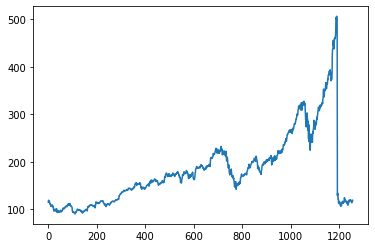

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
#LSTM are sensitive to the scale of the data


In [26]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [32]:
df1

array([[0.05979555],
       [0.06900782],
       [0.06720385],
       ...,
       [0.06179194],
       [0.06313891],
       [0.06905592]])

In [33]:
df1.shape

(1257, 1)

In [38]:
# Splitting the data set into training and testing
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
training_size,test_size

(817, 440)

In [40]:
len(train_data),len(test_data)

(817, 440)

In [45]:
import numpy
# Converting array of values into datasets
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ## i = 0,1,2,3,4
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)


In [46]:
# Reshape into x=t,t+1,t+2,t+3 and y = t+3
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [47]:
print(X_train)

[[0.05979555 0.06900782 0.06720385 ... 0.035454   0.03369814 0.01799158]
 [0.06900782 0.06720385 0.06708358 ... 0.03369814 0.01799158 0.01079976]
 [0.06720385 0.06708358 0.06080577 ... 0.01799158 0.01079976 0.00817799]
 ...
 [0.34090198 0.33108839 0.32218882 ... 0.20177992 0.20202044 0.2033193 ]
 [0.33108839 0.32218882 0.32093806 ... 0.20202044 0.2033193  0.1991822 ]
 [0.32218882 0.32093806 0.32839447 ... 0.2033193  0.1991822  0.20355983]]
